## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (name, surname, student id)

## Understanding Perceptron Learning Algorithm (100 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.
* Description of the dataset used for analysis.

In [7]:
import numpy as np
import matplotlib 


In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)

{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'ID': 261, 'type': 'NATIVE', 'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar

In [1]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

In [9]:
X = X.to_numpy()
y = y.to_numpy().flatten()
np.unique(y)



array(['Besni', 'Kecimen'], dtype=object)

In [10]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFeature names:", raisin.variables)

# Summary statistics
print("\nSummary statistics:")
print(np.mean(X, axis=0))
print(np.std(X, axis=0))

# Check for missing values

print("\n missing values for x :", np.isnan(X).sum())


Shape of X: (900, 7)
Shape of y: (900,)

Feature names:               name     role         type demographic  \
0             Area  Feature      Integer        None   
1  MajorAxisLength  Feature   Continuous        None   
2  MinorAxisLength  Feature   Continuous        None   
3     Eccentricity  Feature   Continuous        None   
4       ConvexArea  Feature      Integer        None   
5           Extent  Feature   Continuous        None   
6        Perimeter  Feature   Continuous        None   
7            Class   Target  Categorical        None   

                                         description units missing_values  
0  Gives the number of pixels within the boundari...  None             no  
1  It measures the environment by calculating the...  None             no  
2  Gives the length of the main axis, which is th...  None             no  
3  Gives the length of the small axis, which is t...  None             no  
4  It gives a measure of the eccentricity of the ...  None 

In [102]:
# Convert the DataFrame to a Numpy array

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Ensuring binary labels are -1 and 1 because that is what perceprton wants
y = np.where(y == 0, -1, 1)

### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

In [104]:
## Analyze the dataset and decide whether scaling is needed.
## Explain your choices in a brief comment.

In [12]:
import pandas as pd

df_X = pd.DataFrame(X, columns=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])

df_y = pd.Series(y, name='target') 

df = pd.concat([df_X, df_y], axis=1)


print(df.describe())

                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter      target  
count     900.000000  900.000000   900.000000  900.000000  
mean    91186.090000    0.699508  1165.906636    0.000000  
std     40769.290132    0.053468   273.764315    1.000556  
min     26139.000000    0.379856   619.074000   -1.000000  
25%     61513.250000    0.670869   966.410750   -1.

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#for feature1, feature5, feature7 .These features has very large value ranges and may contain outliers. 
#for StandardScaler, Sensitive to outliers; large values can distort the scaling.
#for MinMaxScaler, Outliers can compress other values, causing imbalance.
#robustScaler is used for these features because this method Uses median and IQR, so it normalizes the data without being affected by outliers; preserves scale for large values.

columns_for_robust = ['Area', 'ConvexArea', 'Perimeter']
scaler_robust = RobustScaler()
df_X[columns_for_robust] = scaler_robust.fit_transform(df_X[columns_for_robust])


# for feature2, feature3 . These features have Medium value ranges few or no significant outliers.
# for RobustScaler, Not needed, outliers are minimal 
#for MinMaxScaler, Different ranges across features may lead to inconsistency.
#I used Z-score standardization ensures mean 0, std 1; keeps these features compatible with others

standard_columns = ['MajorAxisLength', 'MinorAxisLength']
scaler_standard = StandardScaler()
df_X[standard_columns] = scaler_standard.fit_transform(df_X[standard_columns])

# for feature4, feature6 have already small range (around 0–1) thats why we can directly use min-max scaler. 

minmax_columns = ['Eccentricity', 'Extent']
scaler_minmax = MinMaxScaler()
df_X[minmax_columns] = scaler_minmax.fit_transform(df_X[minmax_columns])

X_scaled= df_X.to_numpy() 
y_array = df_y.to_numpy()




#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data.
2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

#### Training and Validation Split
It is important to split data because model also must work for unseen data which is called generalization. 

Evaluating on unseen data (test data) helps us to understand if the model overfitted or underfitted to trained data . So we can change the parameters up the result.

In [14]:
# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,       #data features  
    y_array,        # taget
    test_size=0.2,  # %20 test, %80 train
    random_state=0 
)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (720, 7)
Shape of X_test: (180, 7)
Shape of Y_train: (720,)
Shape of Y_test: (180,)


### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data. If the dataset had two classes but was not linearly separable, how would the perceptron's performance change? Briefly explain.


-> We use perceptron if model needs to cllasify the data into two classes . If the classes are not directly or almost lineerly seperable accuracy would be low and perceptron wouldnt work properly. 

####  Implement Percepton Learning Algorithm

 The use of basic libraries like Matlab, pandas, and numpy is allowed, but the use of ready-to-use libraries such as scikit-learn is prohibited

In [15]:
learning_rate = 0.1        # learning rate for rate of changing the weights up to gradiant 
epochs_number = 100       

#weights
w = np.zeros(X_scaled.shape[1])  
b=0.00 

print(w)


[0. 0. 0. 0. 0. 0. 0.]


In [16]:

for epoch in range(epochs_number):
    errors = 0 
    for xi, yi in zip(X_train, y_train):
        # Checking prediction
        if yi * np.sign(np.dot(w, xi) + b) <= 0:  # yanlış sınıf 
            w += learning_rate * yi * xi 
            b += learning_rate * yi
            errors += 1
    print(f"Epoch {epoch+1}/{epochs_number}, Misclassified: {errors}")
    if errors == 0:
        break  # converged
    
print("Training complete.")
print("Weights:", w)
print("Bias:", b)
    




Epoch 1/100, Misclassified: 153
Epoch 2/100, Misclassified: 144
Epoch 3/100, Misclassified: 148
Epoch 4/100, Misclassified: 140
Epoch 5/100, Misclassified: 138
Epoch 6/100, Misclassified: 146
Epoch 7/100, Misclassified: 138
Epoch 8/100, Misclassified: 136
Epoch 9/100, Misclassified: 147
Epoch 10/100, Misclassified: 139
Epoch 11/100, Misclassified: 134
Epoch 12/100, Misclassified: 152
Epoch 13/100, Misclassified: 138
Epoch 14/100, Misclassified: 144
Epoch 15/100, Misclassified: 142
Epoch 16/100, Misclassified: 142
Epoch 17/100, Misclassified: 142
Epoch 18/100, Misclassified: 136
Epoch 19/100, Misclassified: 138
Epoch 20/100, Misclassified: 134
Epoch 21/100, Misclassified: 140
Epoch 22/100, Misclassified: 134
Epoch 23/100, Misclassified: 140
Epoch 24/100, Misclassified: 150
Epoch 25/100, Misclassified: 134
Epoch 26/100, Misclassified: 142
Epoch 27/100, Misclassified: 138
Epoch 28/100, Misclassified: 144
Epoch 29/100, Misclassified: 134
Epoch 30/100, Misclassified: 138
Epoch 31/100, Miscl

##### * Make sure you have defined all the necessary parameters in your perceptron model to optimize its performance.

Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?


-> ıf we choose very small learning rate we need more epochs to train more the training data . If the learning rate is huge ,model wouldnt converge because every change in weights would be so big to reach optimum solution and probably will be missed . 

#### Accuracy implementation

In [17]:
def compute_accuracy(w,b, X, y):
    print(w)
    errors=0
    y_pred = []
    for xi, yi in zip(X, y):
        pred = np.sign(np.dot(w, xi) + b)
        y_pred.append(pred)
        if yi * pred <= 0:  # yanlış sınıf 
            errors += 1
    accuracy =( 1- errors/len(X_train) )*100
    return accuracy, y_pred
        
    

#### Train the Perceptron

#### Prediction on Training Data

In [18]:
# Predicting on the training data
accuracy_train,y_pred_train = compute_accuracy(w,b,X_train,y_train)
print("Training Accuracy:", accuracy_train)

[-0.37250234  0.38070664  0.47404114  0.27911692 -0.58109576 -0.03197865
 -0.84568936]
Training Accuracy: 84.86111111111111


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?
   
-->If the accuracy is lower than 50 percent that means model does not work for data that we have . I its higher thats mean model nearly work .If it gets higher thats mean model works for this data. We can change the model if accuracy is low ,otherwise we can set up the parameters to get better accuracy 

2. Why is accuracy sometimes not enough, especially in cases where the data is imbalanced? Explain a scenario where a high accuracy might be misleading.
   
->For a inbalanced dataset if we have class A 90 percent , İf we have 90 percent odf accuracy that can mean the model predict model A for all the examples . 

3. In what types of problems is precision more important than recall?
   
->Precision becomes more important than recall in problems where the cost of a false positive is higher than the cost of a false negative. In other words, when you would rather miss some true cases than wrongly flag something as positive.

4. In what cases is recall more critical?
   
-->Recall becomes more critical when the cost of a false negative (missing a true positive) is higher than the cost of a false positive.
In other words, when failing to detect something important is more dangerous than raising a few false alarms.

5. When is the F1 score a better measure than accuracy? What are the limitations of using F1 score alone?
    
->The F1 score is better than accuracy when classes are imbalanced or when both false positives and false negatives are important, as it balances precision and recall. However, it ignores true negatives and hides the trade-off between precision and recall, so it shouldn’t be used alone to judge a model’s overall performance.

### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [19]:
## Evaluate the model's performance on the test set by calculating accuracy. Print classification report and confusion matrix
accuracy_test ,y_pred_test= compute_accuracy(w,b,X_test,y_test)
print("Testing Accuracy:", accuracy_test)

[-0.37250234  0.38070664  0.47404114  0.27911692 -0.58109576 -0.03197865
 -0.84568936]
Testing Accuracy: 96.80555555555556


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?

-> Accuracy is high so we can say perceptrın model is suitbale for this data set but also data set is lineerly seperable

2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading

->If data is imbalanced maybe it has high bias ( i mean prejudice ) for model and always choose first class but but it may also seem correct when it is not 

In [20]:
def calculate_metrics(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=int).ravel()
    y_pred = np.asarray(y_pred, dtype=int).ravel()
    
    accuracy = np.mean(y_true == y_pred)

    # True Positive/ False Positive/ False Negative
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == -1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == -1))

    print(f"TP={tp}, FP={fp}, FN={fn}")
    
    # Precision Recall F1 hesaplaması 
    precision = tp / (tp + fp) 
    recall = tp / (tp + fn) 
    f1 = 2 * (precision * recall) / (precision + recall) 


    return accuracy, precision, recall, f1

# Calculate and print metrics

accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

TP=351, FP=93, FN=16
Training Accuracy: 0.8486111111111111
Training Precision: 0.7905405405405406
Training Recall: 0.9564032697547684
Training F1 Score: 0.8655980271270037


 *Carefully examine the **classification report** obtained after the classification process.  
Analyze each metric in the report — such as **accuracy, precision, recall, f1-score, and support** — and interpret the performance of your model.*  

*For each metric, explain:*  
*- What this value represents in the context of your model,*  
*- What it means if the value is high or low, and*  
*- Which aspects of your model are strong or weak based on this metric.*



Accuracy (0.85): About 85% of all predictions are correct, showing good overall performance. However, it may hide class imbalance effects since it treats all errors equally.

Precision (0.79): Around 79% of predicted positives are truly positive, meaning the model sometimes gives false alarms. This shows slightly weaker control over false positives.

Recall (0.96): The model correctly identifies 96% of actual positives, showing it rarely misses true cases. It’s highly sensitive and effective at detecting positives.

F1 Score (0.87): This score reflects a strong balance between precision and recall. The model performs reliably overall, though it could still reduce false positives fo+r improvement.


### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the decision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the all features to identify pairs of features with low
correlation.

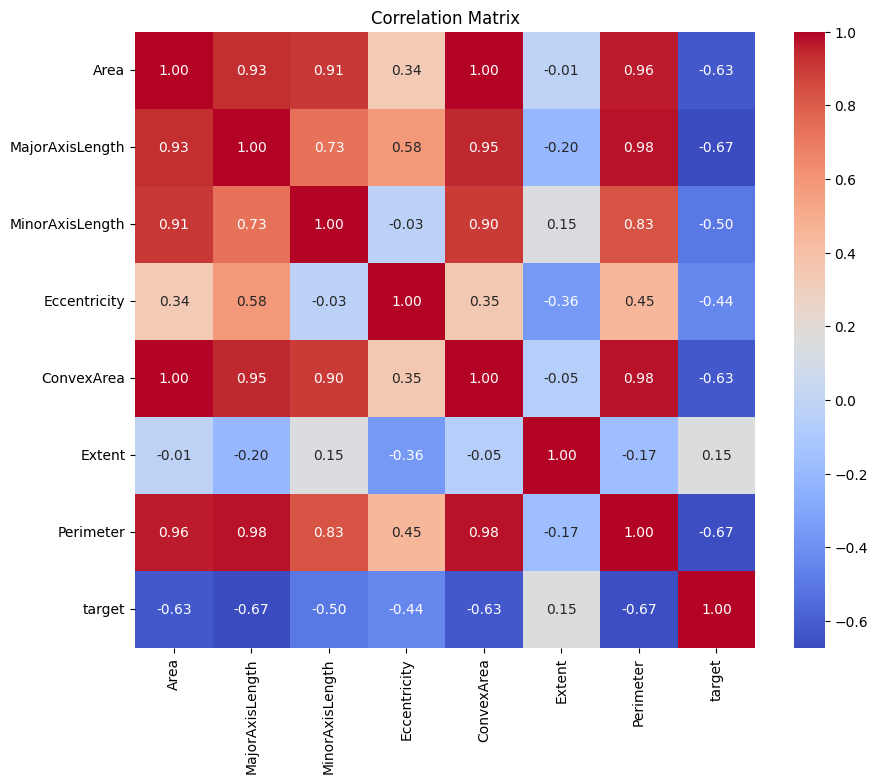

In [21]:
# Compute the correlation matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Örneğin verin bir pandas DataFrame'de olsun: df
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")


# Display the correlation matrix as a heatmap
plt.show()

3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [22]:
# Select two features (for example (Area and ConvexArea) and two more pair) according to their correlation
# Select these features from the original feature set
# Find a pair of features such that the separation between classes is at its highest level. Similarly, find a pair of features such that the separation between classes is at its lowest level. Finally, find the pair of features with average separability.
# Split the selected features into training and validation sets if not done yet

In [23]:
selected_features = ['ConvexArea', 'Extent']

# Prepare feature matrix
X_selected = df_X[selected_features].to_numpy()

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y_array, test_size=0.2, random_state=42
)

print("Selected features:", selected_features)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Selected features: ['ConvexArea', 'Extent']
X_train shape: (720, 2)
y_train shape: (720,)


#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [24]:
learning_rate = 0.1        # learning rate for rate of changing the weights up to gradiant 
epochs_number = 200    

#weights
w = np.zeros(X_selected.shape[1])  
b=0.00 

print(w)


[0. 0.]


In [25]:
## Train the Perceptron model on the training set.
for epoch in range(epochs_number):
    errors = 0 
    for xi, yi in zip(X_train, y_train):
        # Checking prediction
        if yi * np.sign(np.dot(w, xi) + b) <= 0:  # yanlış sınıf 
            w += learning_rate * yi * xi 
            b += learning_rate * yi
            errors += 1
    print(f"Epoch {epoch+1}/{epochs_number}, Misclassified: {errors}/{len(X_selected)}")
    if errors == 0:
        break  # converged
    
print("Training complete.")
print("Weights:", w)
print("Bias:", b)
    
# Predicting on the training data

accuracy_selected, selected_pred_train = compute_accuracy(w,b,X_train,y_train )
print("Training Accuracy:", accuracy_selected)

Epoch 1/200, Misclassified: 175/900
Epoch 2/200, Misclassified: 171/900
Epoch 3/200, Misclassified: 171/900
Epoch 4/200, Misclassified: 173/900
Epoch 5/200, Misclassified: 165/900
Epoch 6/200, Misclassified: 164/900
Epoch 7/200, Misclassified: 169/900
Epoch 8/200, Misclassified: 174/900
Epoch 9/200, Misclassified: 172/900
Epoch 10/200, Misclassified: 171/900
Epoch 11/200, Misclassified: 166/900
Epoch 12/200, Misclassified: 178/900
Epoch 13/200, Misclassified: 169/900
Epoch 14/200, Misclassified: 169/900
Epoch 15/200, Misclassified: 165/900
Epoch 16/200, Misclassified: 173/900
Epoch 17/200, Misclassified: 166/900
Epoch 18/200, Misclassified: 178/900
Epoch 19/200, Misclassified: 168/900
Epoch 20/200, Misclassified: 170/900
Epoch 21/200, Misclassified: 174/900
Epoch 22/200, Misclassified: 168/900
Epoch 23/200, Misclassified: 168/900
Epoch 24/200, Misclassified: 168/900
Epoch 25/200, Misclassified: 169/900
Epoch 26/200, Misclassified: 175/900
Epoch 27/200, Misclassified: 172/900
Epoch 28/2

2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

In [26]:
# Function to plot the decision boundary (improved version)
def plot_decision_boundary(X, y, w, b):
    import numpy as np
    import matplotlib.pyplot as plt

    # Eğer sınıf etiketleri 0/1 ise -> -1/+1'e çevir
    if set(np.unique(y)) == {0, 1}:
        y = np.where(y == 0, -1, 1)

    # Görsel sınır aralıklarını belirle (uç değerleri kırparak)
    x_min, x_max = np.percentile(X[:, 0], [1, 99])
    y_min, y_max = np.percentile(X[:, 1], [1, 99])

    x_min -= 0.05 * (x_max - x_min)
    x_max += 0.05 * (x_max - x_min)
    y_min -= 0.05 * (y_max - y_min)
    y_max += 0.05 * (y_max - y_min)

    # Grid oluştur
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Her grid noktasının sınıfını hesapla
    Z = np.sign(w[0] * xx + w[1] * yy + b)
    Z = Z.reshape(xx.shape)

    # --- Görseli çiz ---
    plt.figure(figsize=(8, 6))

    # Arka plan renk bölgeleri
    plt.contourf(xx, yy, Z, alpha=0.15, cmap=plt.cm.coolwarm)

    # Veri noktalarını sınıflarına göre çiz
    class1 = y == 1
    class2 = y == -1

    plt.scatter(X[class1, 0], X[class1, 1],
                c='red', marker='*', label='Class +1',
                edgecolors='k', s=80)
    plt.scatter(X[class2, 0], X[class2, 1],
                c='blue', marker='s', label='Class -1',
                edgecolors='k', s=60)

    # Karar sınırı (w0*x1 + w1*x2 + b = 0)
    x1_line = np.linspace(x_min, x_max, 200)
    x2_line = -(w[0] * x1_line + b) / w[1]
    plt.plot(x1_line, x2_line, 'k--', linewidth=2, label='Decision Boundary')

    # Aks etiketleri ve başlık
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True)

    # Ekseni veriye göre ayarla
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # (İsteğe bağlı) Log ölçekleme aktif etmek için yorum kaldır
    # plt.xscale('log')
    # plt.yscale('log')

    plt.show()


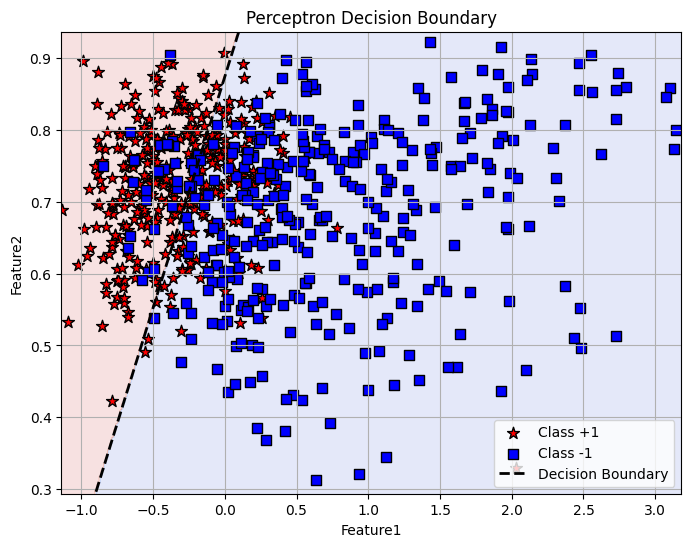

In [27]:
plot_decision_boundary(X_train,y_train,w,b)

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., Area and MaxorAxisLength) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

In [28]:
selected_features = ['Eccentricity', 'Perimeter']

# Prepare feature matrix
X_selected = df_X[selected_features].to_numpy()

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y_array, test_size=0.2, random_state=42
)

print("Selected features:", selected_features)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Selected features: ['Eccentricity', 'Perimeter']
X_train shape: (720, 2)
y_train shape: (720,)


In [29]:
learning_rate = 0.1        # learning rate for rate of changing the weights up to gradiant 
epochs_number = 200    

#weights
w = np.zeros(X_selected.shape[1])  
b=0.00 

print(w)


[0. 0.]


In [30]:
for epoch in range(epochs_number):
    errors = 0 
    for xi, yi in zip(X_train, y_train):
        # Checking prediction
        if yi * np.sign(np.dot(w, xi) + b) <= 0:  # yanlış sınıf 
            w += learning_rate * yi * xi 
            b += learning_rate * yi
            errors += 1
    print(f"Epoch {epoch+1}/{epochs_number}, Misclassified: {errors}/{len(X_selected)}")
    if errors == 0:
        break  # converged
    
print("Training complete.")
print("Weights:", w)
print("Bias:", b)
    
# Predicting on the training data

accuracy_selected, selected_pred_train = compute_accuracy(w,b,X_train,y_train )
print("Training Accuracy:", accuracy_selected)

Epoch 1/200, Misclassified: 151/900
Epoch 2/200, Misclassified: 155/900
Epoch 3/200, Misclassified: 160/900
Epoch 4/200, Misclassified: 152/900
Epoch 5/200, Misclassified: 150/900
Epoch 6/200, Misclassified: 148/900
Epoch 7/200, Misclassified: 156/900
Epoch 8/200, Misclassified: 150/900
Epoch 9/200, Misclassified: 150/900
Epoch 10/200, Misclassified: 154/900
Epoch 11/200, Misclassified: 154/900
Epoch 12/200, Misclassified: 154/900
Epoch 13/200, Misclassified: 152/900
Epoch 14/200, Misclassified: 156/900
Epoch 15/200, Misclassified: 152/900
Epoch 16/200, Misclassified: 154/900
Epoch 17/200, Misclassified: 152/900
Epoch 18/200, Misclassified: 154/900
Epoch 19/200, Misclassified: 148/900
Epoch 20/200, Misclassified: 150/900
Epoch 21/200, Misclassified: 154/900
Epoch 22/200, Misclassified: 152/900
Epoch 23/200, Misclassified: 154/900
Epoch 24/200, Misclassified: 152/900
Epoch 25/200, Misclassified: 152/900
Epoch 26/200, Misclassified: 152/900
Epoch 27/200, Misclassified: 150/900
Epoch 28/2

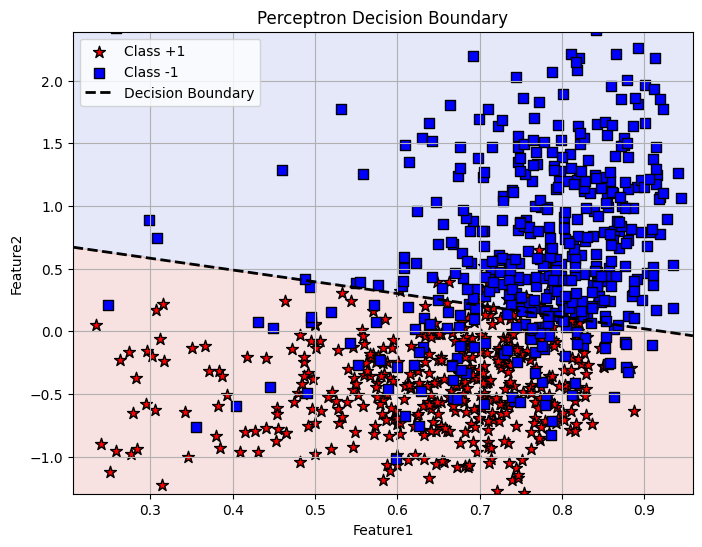

In [31]:
plot_decision_boundary(X_selected,y_array,w,b)

* Answer the guiding questions:  
1. How does the decision boundary change when you use different pairs of features?

-> ıt changes direction also can seem more clear to seperate data 

2. Can you find a pair of features that leads to better separation between the two classes? Also explain why this feature pair causes the better separation.

---> Based on these values, Perimeter and MajorAxisLength have the strongest correlation with the target, meaning these two features are the most linearly separable variables between the classes.

3. If the classes cannot be linearly separated in a given pair of features, can we still talk about a linear relationship between them? Explain your reasoning.

--> If the classes cannot be linearly separated, it means no straight line can divide them clearly. However, a linear relationship can still exist — the data might follow a linear trend overall, even if the classes overlap or have noise. So, lack of separability doesn’t mean lack of linearity, only that a single linear boundary isn’t sufficient for perfect classification.


#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of the dataset and progressively add more data points to train the Perceptron.

* For example, draw the decision boundary using the first 5% of the data, then increase it by 10% increments, continuing the process until the entire dataset is used, and draw the decision boundary at each step.


2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)
* In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [44]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant projection direction."""

    # Sınıfları ayır
    X0 = X[y == -1]
    X1 = X[y == 1]

    print(len(X0))
    print(len(X1))

    # (a) Ortalama vektörleri hesapla
    mu0 = np.mean(X0, axis=0)
    mu1 = np.mean(X1, axis=0)

    # (b) Within-class scatter matrix (S_within)
    S0 = np.cov(X0, rowvar=False)
    S1 = np.cov(X1, rowvar=False)
    S_within = S0 + S1

    # (c–d) Fisher yönü: w = S_within^-1 * (mu1 - mu0)
    w = np.linalg.inv(S_within).dot(mu1 - mu0)

    # (e) Normalize et (birim vektör)
    w = w / np.linalg.norm(w)

    return w


def project_data(X, direction):
    """Project data onto the Fisher LD direction."""

    projected = X.dot(direction)
    return projected

    

In [52]:
direction = fisher_ld_projection(X_scaled,y)

# Project the data onto the Fisher LD direction
projected_data = project_data(X_scaled,direction)

450
450


### Visualizations
#### 2D Feature Space (Optional but Recommended)
* While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

In [53]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector
# Do not forget to scale the direction vector to visualize it properly
scale = 4 # Adjust this to control the length of the direction line

### 1D Projected Space (Required)
* Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

In [54]:
# Plot the histogram of the projected data

In [57]:
def plot_histogram(projected_data, y_array):
    """Plot histogram of the projected data for both classes."""
    plt.figure(figsize=(8, 5))
    plt.hist(projected_data[y == -1], bins=30, alpha=0.6, label='Class -1')
    plt.hist(projected_data[y == 1], bins=30, alpha=0.6, label='Class 1')
    plt.xlabel("Projected Value (onto Fisher LD direction)")
    plt.ylabel("Frequency")
    plt.title("Fisher’s Linear Discriminant Projection (1D)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?

-->If data is lineerly seperable this algorithms works at the end also works better with small data sets as we have .

2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?


--> In the original 2D space, the two classes may overlap and not be easily separable by a clear boundary. After applying Fisher’s Linear Discriminant and projecting the data onto 1D, the classes become more compact and better separated along a single axis, showing clearer distinction between their means and reduced overlap.

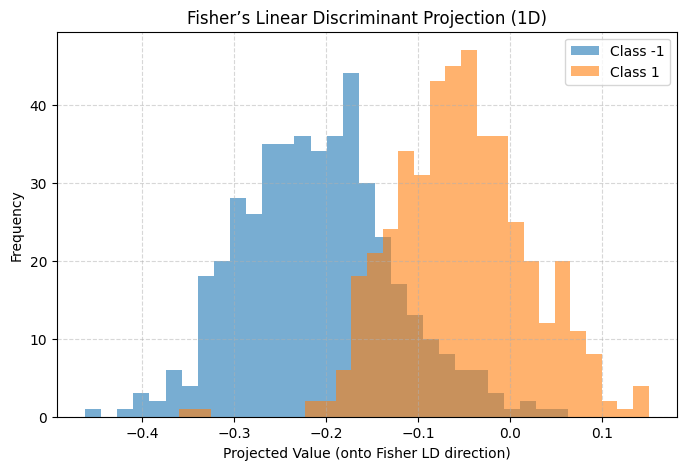

In [58]:
plot_histogram(projected_data, y_array)